 2. Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The data
set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),
Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
Admitted is the target variable.
Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)Data
Set : https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.
Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if
necessary.
Perform data-preparation ( Train-Test Split) 

In [3]:
hin= "\u0930\u094B\u0936\u0928\u0940 \u0917\u094C\u0921\u093C"
print("Developed by",hin)

Developed by रोशनी गौड़


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.utils import resample

In [6]:
df = pd.read_csv('./admissionPredict.csv')

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
#Shape
shape = df.shape
print("Number of Samples:", shape[0])
print("Number of Features:", shape[1])

Number of Samples: 500
Number of Features: 9


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df = df.drop('Serial No.',axis=1)

In [11]:
df.shape

(500, 8)

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
# Step 1: Use the 75 distinct = 'Chance of Admit ' to (0 or 1)
threshold = df['Chance of Admit '].describe()['75%']
df['Admitted'] = (df['Chance of Admit '] >= threshold).astype(int)

# Drop original'Chance of Admit 'column as it's now converted
df = df.drop(['Chance of Admit '], axis=1)

# Check for class imbalance
admitted_counts = df['Admitted'].value_counts()

# Display threshold used n class distribution
threshold, admitted_counts

(0.82,
 Admitted
 0    367
 1    133
 Name: count, dtype: int64)

In [24]:
# Check current class distribution
admitted_counts = df['Admitted'].value_counts()

# Separate majority and minority classes based on current distribution
df_majority = df[df['Admitted'] == 0]  # Not Admitted
df_minority = df[df['Admitted'] == 1]  # Admitted

# Upsample minority class (Admitted) to match size of majority class (Not Admitted)
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=len(df_majority),  # to match the majority class
                                 random_state=42)   # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Check new class distribution
balanced_counts = df_balanced['Admitted'].value_counts()
balanced_counts

Admitted
0    367
1    367
Name: count, dtype: int64

In [26]:
x = df[['GRE Score','University Rating','CGPA']]

y = df['Admitted']

# Drop columns from balance dataset except specified features in x n target y
df_balanced = df_balanced[['GRE Score', 'University Rating', 'CGPA', 'Admitted']]

df_balanced.head()

,GRE Score,University Rating,CGPA,Admitted
1,324,4,8.87,0
2,316,3,8.00,0
3,322,3,8.67,0
4,314,2,8.21,0
6,321,3,8.20,0


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=14)

In [30]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_train {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (375, 3)
y_train (375,)
y_train (125, 3)
y_test (125,)


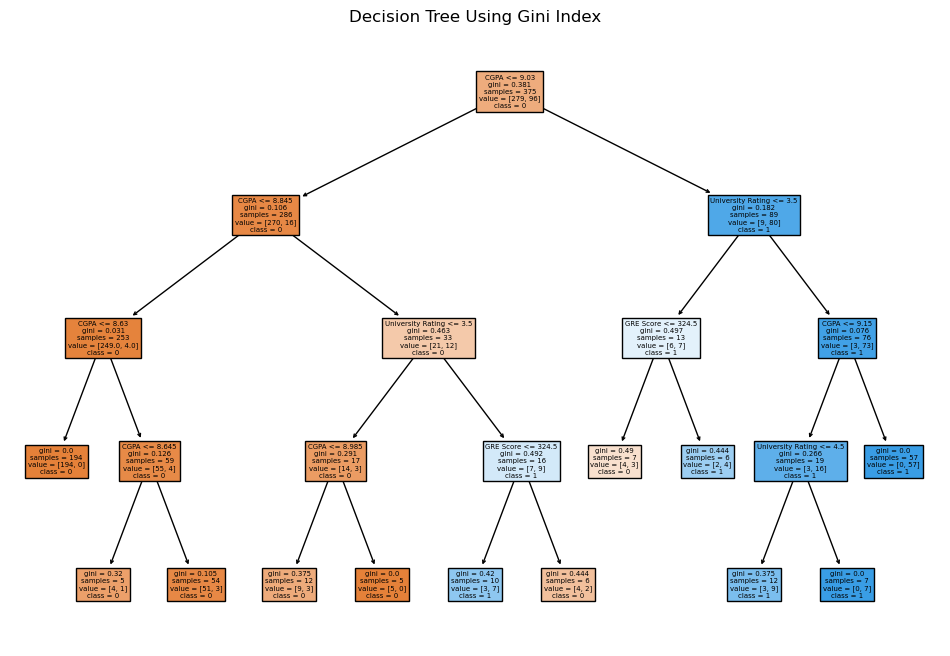

In [79]:
# Function to train and return model using Gini index
def train_gini_model(x_train, y_train):
    model = DecisionTreeClassifier(
        criterion='gini',
        max_depth=4,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=14
    )
    model.fit(x_train, y_train)
    return model

# Function to plot the Gini index decision tree
def plot_gini_tree(model, x_train):
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=x_train.columns, 
              class_names=[str(cls) for cls in model.classes_])
    plt.title('Decision Tree Using Gini Index')
    plt.show()

# Train the Gini index model
gini_model = train_gini_model(x_train, y_train)

# Plot the Gini index decision tree
plot_gini_tree(gini_model, x_train)

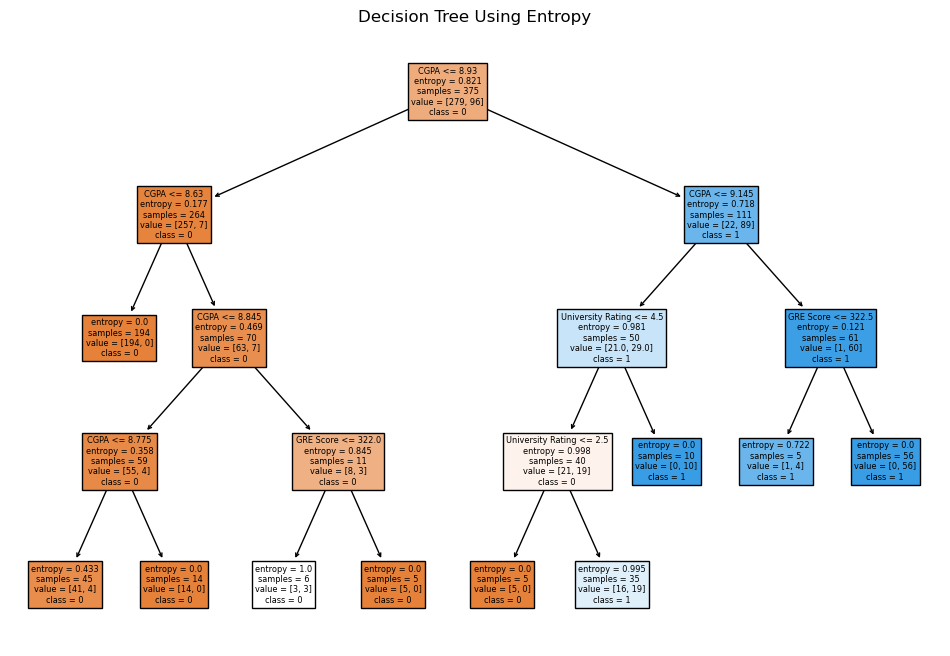

In [81]:
# Function to train and return model using Entropy
def train_entropy_model(x_train, y_train):
    model = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=4,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=14
    )
    model.fit(x_train, y_train)
    return model

# Function to plot the Entropy decision tree
def plot_entropy_tree(model, x_train):
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=x_train.columns, 
              class_names=[str(cls) for cls in model.classes_])
    plt.title('Decision Tree Using Entropy')
    plt.show()

# Train the Entropy model
entropy_model = train_entropy_model(x_train, y_train)

# Plot the Entropy decision tree
plot_entropy_tree(entropy_model, x_train)